<a href="https://colab.research.google.com/github/20161609/AI-Tech-Learning/blob/main/05_knn_bin_citrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Binary Classification
- Binary classification of Orange and Grapefruit

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

## 1. Data Preparation

In [34]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

In [35]:
citrus_link = 'https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv'
citrus = pd.read_csv(citrus_link)
# citrus = pd.read_csv('citrus.csv')
citrus.shape

(10000, 6)

In [36]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [37]:
df = citrus.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diameter,10000.0,9.975685,1.947844,2.96,8.46,9.980,11.4800,16.45
weight,10000.0,175.050792,29.212119,86.76,152.22,174.985,197.7225,261.51
red,10000.0,153.847800,10.432954,115.00,147.00,154.000,161.0000,192.00
green,10000.0,76.010600,11.708433,31.00,68.00,76.000,84.0000,116.00
blue,10000.0,11.363200,9.061275,2.00,2.00,10.000,17.0000,56.00


### Categorical Variable

### Missing Values

In [39]:
df.isna().sum(axis=0)

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


### Duplication

In [40]:
df.duplicated().sum()

0

## 2. Split into Training and Testing Data

In [41]:
df = df.sample(frac=1, random_state=SEED)
df.head()

,name,diameter,weight,red,green,blue
6252,grapefruit,10.66,184.37,166,60,18
4684,orange,10.40,181.34,166,109,13
1731,orange,7.99,145.45,150,72,2
4742,orange,10.55,182.99,151,84,2
4521,orange,10.10,177.31,160,72,2


In [42]:
idx_train = int(len(df) * 0.6)
idx_val = int(len(df)* 0.8)

In [43]:
train = df.iloc[:idx_train, :]
val = df.iloc[idx_train:idx_val, :]
test = df.iloc[idx_val:, :]

train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

### Separate X and Y Variables

In [44]:
X_train = train.drop('name', axis=1)
y_train = train['name']

In [45]:
X_val = val.drop('name', axis=1)
y_val = val['name']

In [46]:
y_train.value_counts(), y_val.value_counts()

(name
 orange        3062
 grapefruit    2938
 Name: count, dtype: int64,
 name
 grapefruit    1042
 orange         958
 Name: count, dtype: int64)

## Scaling

In [47]:
u = X_train.mean()
std = X_train.std()

u, std

(diameter      9.933560
 weight      174.427638
 red         154.088833
 green        76.107500
 blue         11.222500
 dtype: float64,
 diameter     1.948931
 weight      29.212149
 red         10.459948
 green       11.788162
 blue         9.014315
 dtype: float64)

In [48]:
X_train_s = (X_train - u)/std
X_train_s.head()

,diameter,weight,red,green,blue
6252,0.372738,0.340350,1.138741,-1.366413,0.751860
4684,0.239331,0.236626,1.138741,2.790299,0.197186
1731,-0.997244,-0.991972,-0.390904,-0.348443,-1.023095
4742,0.316296,0.293110,-0.295301,0.669528,-1.023095
4521,0.085401,0.098670,0.565124,-0.348443,-1.023095


In [49]:
X_val_s = (X_val - u)/std
X_val_s.head()

,diameter,weight,red,green,blue
2480,-0.756086,-0.751661,-0.390904,-0.009119,-0.801226
289,-1.756635,-1.753299,-0.104095,0.160542,-0.135618
6086,0.306034,0.266408,-1.538137,-1.536075,0.973729
3075,-0.561108,-0.558933,0.851932,2.281314,0.308121
8123,0.988460,1.001377,-0.773315,-1.366413,0.862794


In [50]:
ss_dic = {'mean':u, 'std':std}
ss_dic

{'mean': diameter      9.933560
 weight      174.427638
 red         154.088833
 green        76.107500
 blue         11.222500
 dtype: float64,
 'std': diameter     1.948931
 weight      29.212149
 red         10.459948
 green       11.788162
 blue         9.014315
 dtype: float64}

## Encoding

In [51]:
label_dict = {'grapefruit':0, 'orange':1}

In [52]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)

y_train_e, y_val_e

(6252    0
 4684    1
 1731    1
 4742    1
 4521    1
        ..
 7895    0
 9590    0
 7288    0
 278     1
 3252    1
 Name: name, Length: 6000, dtype: int64,
 2480    1
 289     1
 6086    0
 3075    1
 8123    0
        ..
 1638    1
 5891    0
 7427    0
 608     1
 6907    0
 Name: name, Length: 2000, dtype: int64)

In [53]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()

X_val_s = X_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

In [54]:
print(X_train_s.shape, y_train_e.shape)
print(X_val_s.shape, y_val_e.shape)
print(type(X_train_s), type(y_train_e))
print(type(X_val_s), type(y_val_e))

(6000, 5) (6000,)
(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Model Learning

In [55]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s, y_train_e)

KNeighborsClassifier()

### validation

In [56]:
y_pred = clf.predict(X_val_s)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [57]:
y_val_e

array([1, 1, 0, ..., 0, 1, 0])

In [58]:
(y_pred == y_val_e).sum()/len(y_val_e)

0.9235

In [59]:
from sklearn.metrics import accuracy_score

scores = []
for k in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_s, y_train_e)
    y_pred = clf.predict(X_val_s)
    acc = accuracy_score(y_val_e, y_pred)
    scores.append(acc)

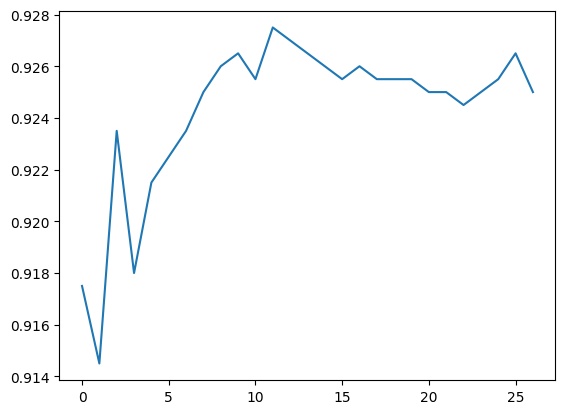

In [60]:
plt.plot(scores)

## Test

In [61]:
test.head()

,name,diameter,weight,red,green,blue
399,orange,6.70,126.50,168,80,3
7247,grapefruit,11.29,194.97,151,65,14
6406,grapefruit,10.77,186.32,158,72,19
882,orange,7.31,135.44,148,87,7
3565,orange,9.16,163.25,172,81,2


In [62]:
X_test = test.drop('name', axis=1)
y_test = test['name']

In [63]:
X_test_s = (X_test - ss_dic['mean'])/ss_dic['std']
y_test_e = y_test.map(label_dict)

In [64]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

In [65]:
y_pred = clf.predict(X_test_s)

In [66]:
(y_test_e == y_pred).sum()/len(y_test_e)

0.932

In [67]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test_e, y_pred)
cfm

array([[951,  69],
       [ 67, 913]])

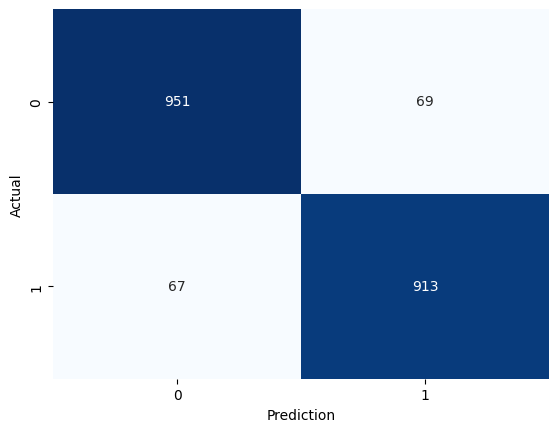

In [68]:
s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print('accuracy:', accuracy_score(y_test_e, y_pred))
print('recall:', recall_score(y_test_e, y_pred))
print('precision:', precision_score(y_test_e, y_pred))
print('f1 :', f1_score(y_test_e, y_pred))


accuracy: 0.932
recall: 0.9316326530612244
precision: 0.929735234215886
f1 : 0.9306829765545361
